In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Reading train data

train=pd.read_csv(r"C:\Users\Dell\Desktop\Datasets\Loan_prediction\train_ctrUa4K.csv")

In [3]:
## Reading test data

test=pd.read_csv(r"C:\Users\Dell\Desktop\Datasets\Loan_prediction\test_lAUu6dG.csv")

In [4]:
## Dimensions of train and test data

train.shape,test.shape

((614, 13), (367, 12))

In [5]:
## Save the original data by creating its copy

train_original=train.copy()
test_original=test.copy()

In [6]:
## Displays columns of train data

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
## Displays columns of test data

test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
## Data-types

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
## Number of Loan approval and disapproval

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
## Proportion of Loan approved and dis-approved

train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

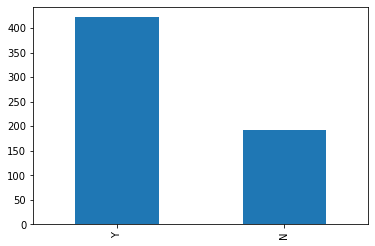

In [11]:
## Checking the same graphically

train['Loan_Status'].value_counts().plot.bar()

In [12]:
## Out of 614 applications 422 got the loan while remaining 192 did not get the loan.
## Around 68.73% got appoved for the loan.

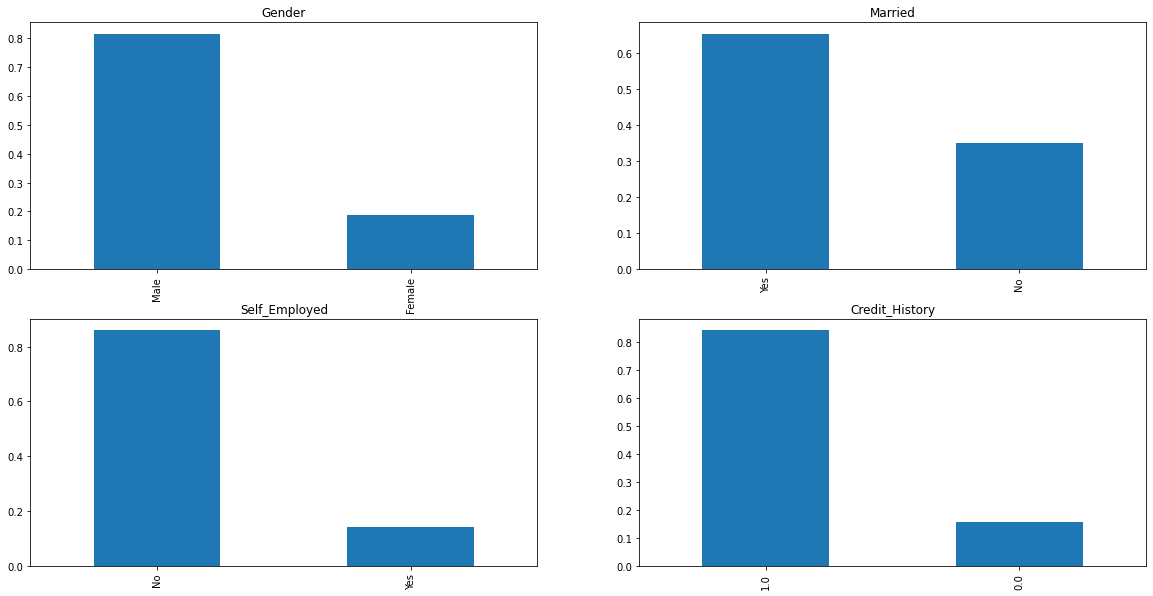

In [13]:
## Plotting Categorical features

plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.show()

In [14]:
## Among all applicants around 85% of them were males while remaining 15% were females.
## Around 65% of applicants were married while other 35% were unmarried.
## Only 15% of applicants were self-employed.
## Almost 85% applicants repaid their debts.

<AxesSubplot:title={'center':'Propert_Area'}>

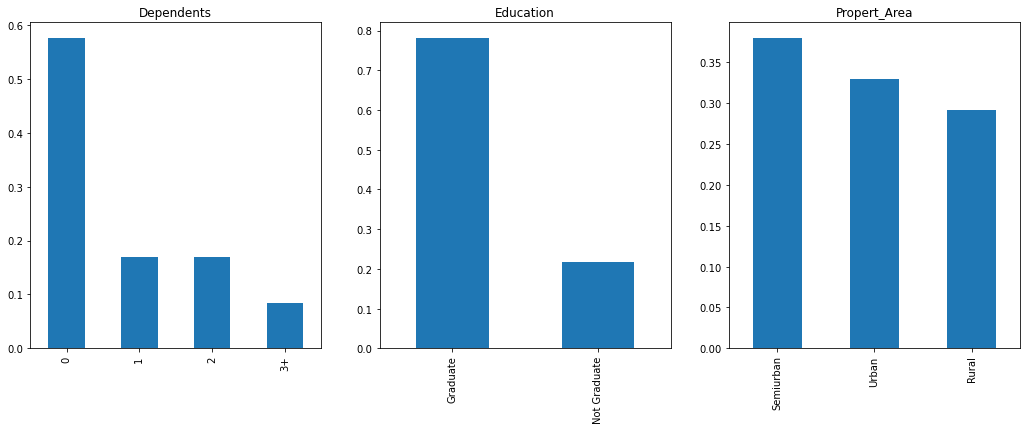

In [15]:
## Plotting independent Ordinal variables

plt.figure(1)
plt.subplot(142)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')

plt.subplot(143)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(144)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Propert_Area')

In [16]:
## Most of the applicants dont have any dependents.
## Around 80% of applicants are graduate.
## Most of the applicants are from semi-urban area.

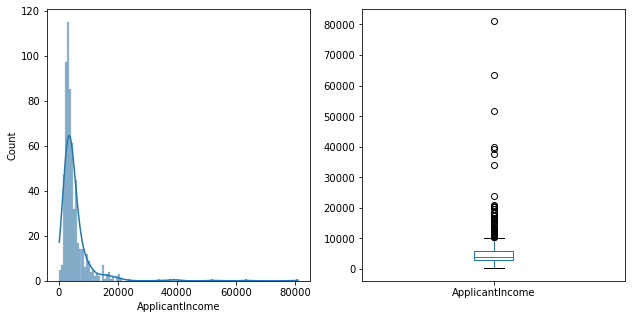

In [17]:
## Plotting Applicants Income

plt.figure(1)
plt.subplot(131)
sns.histplot(train['ApplicantIncome'],kde=True);

plt.subplot(132)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [18]:
## It can be inferred that most of the income is right skewed.
## The boxplot indicates the presence of outliers.

Text(0.5, 0.98, '')

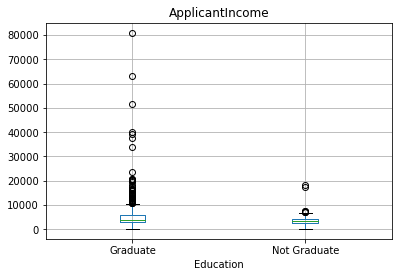

In [19]:
## Applicasnts income by Education

train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

In [20]:
## Higher number of graduates have high outliers.

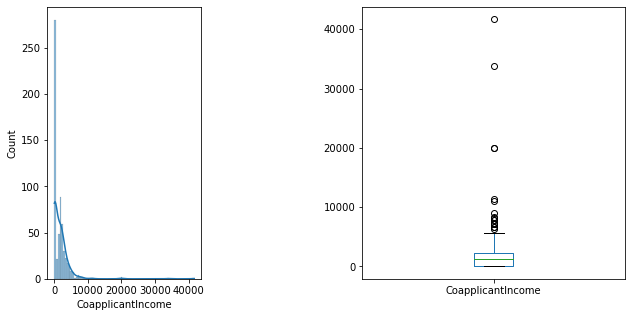

In [21]:
## Co-applicants Income distribution

plt.figure(1)
plt.subplot(151)
sns.histplot(train['CoapplicantIncome'],kde=True);

plt.subplot(132)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [22]:
## The distribution of Co-applicants income is similar to Applicants income.
## Co-applicant income ranges from 0-50000.
## Co-applicants have outliers.
## The distribution is not Normal.

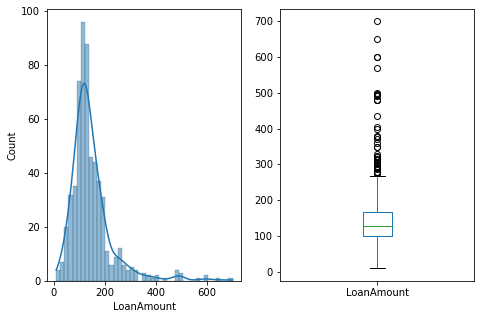

In [23]:
## Distribution of Loan amount

plt.figure(1)
plt.subplot(141)
sns.histplot(train['LoanAmount'],kde=True)

plt.subplot(142)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [24]:
## We can say that Loan amount is right skewed.
## Outliers are present.

<AxesSubplot:xlabel='Gender'>

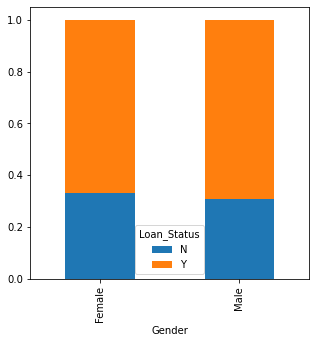

In [25]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))

<Figure size 432x288 with 0 Axes>

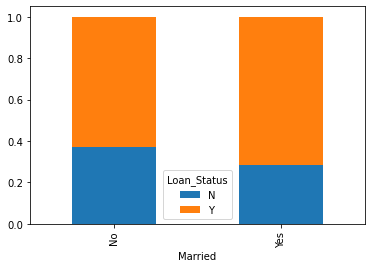

In [26]:
plt.figure(1)
Married=pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

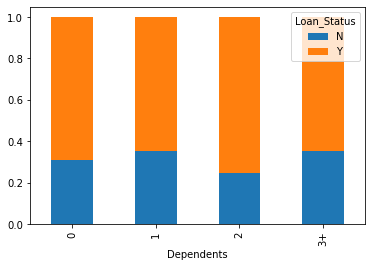

In [27]:
Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

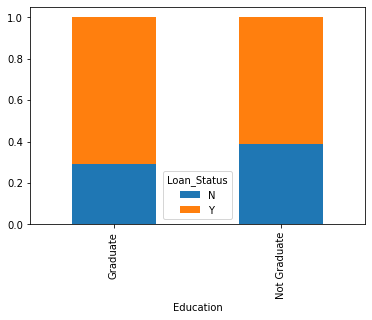

In [28]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

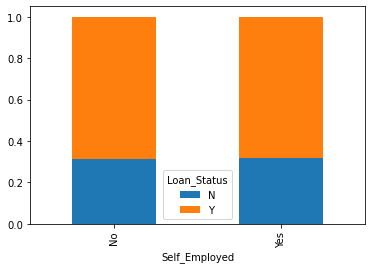

In [29]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

In [30]:
## Porportion of Loan approved for all features plotted above does not seem to have much significant effect.

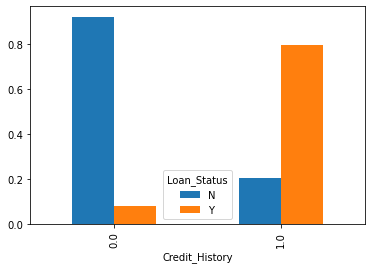

In [31]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar")
plt.show()

In [32]:
## Applicants with credit history as 1 have higher chances of getting loan approved.

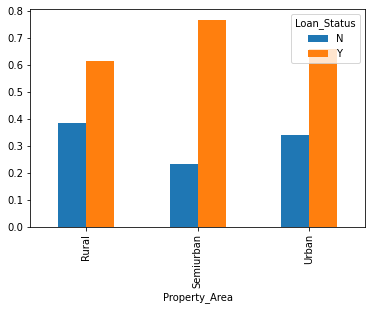

In [33]:
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar")
plt.show()

In [34]:
## People of semi-urban has maximum chances of loan approval.

Text(0, 0.5, 'Percentage')

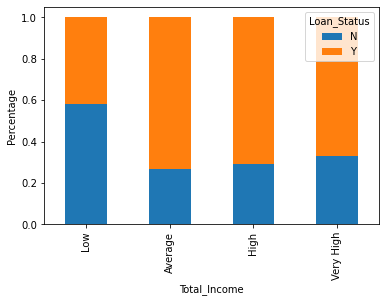

In [35]:
## Adding new column 'Total_Income' to the data and visualising the approval of loan for different level based on total_Income.

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

In [36]:
## We can see that the proportion of loans getting approved having low Total_Income is very less comparitively to other applicants.

Text(0, 0.5, 'Percentage')

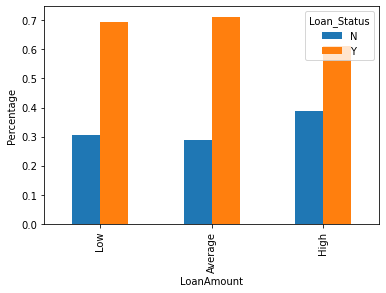

In [37]:
## Visualising the Loan Amount.

bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar")
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [38]:
## Low and Average Loan amount is more approved as compared to high Loan amount.

In [39]:
train=train.drop(['Total_Income','Total_Income_bin','LoanAmount_bin'],axis=1)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [40]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


<AxesSubplot:>

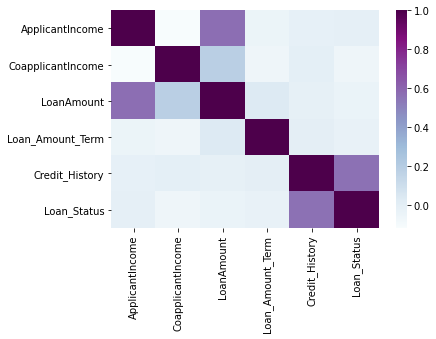

In [41]:
cor=train.corr()
sns.heatmap(cor,vmax=1,cmap="BuPu")

In [42]:
## (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status) are most correlated. LoanAmount is also correlated to LoanAmount. 

In [43]:
## Checking for missing values on train data

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
## Checking for missing values on test data

test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [45]:
## Imputing missing values of categorical column

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [46]:
## Imputation for Loan_Amount_Term

train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [47]:
## Here, it can be seen that, the value of 360 is repeating the most. So, replacing the missing values by mode.

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [48]:
## Filiing missing values of Loan Amount variable.
## We have seen that this column has outliers therefore filling the missing values by median would be preffered.

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [49]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Text(0.5, 1.0, 'log_LoanAmount for test')

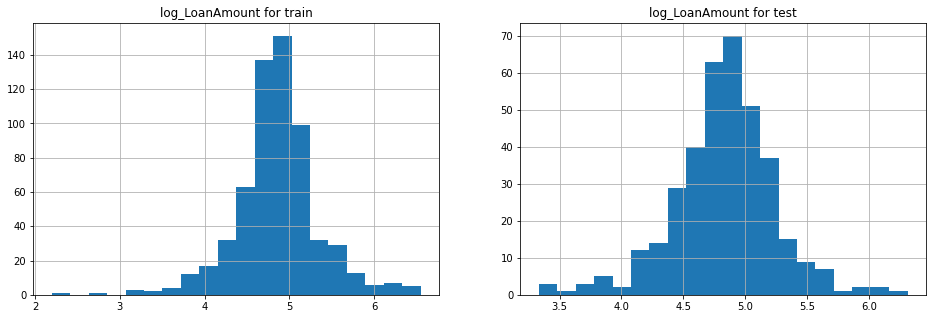

In [51]:
## Log-transformation for Normalization

plt.figure(1)
plt.subplot(121)
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
plt.title("log_LoanAmount for train")

plt.subplot(122)
test['LoanAmount_log']=np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20, figsize=(16,5))
plt.title("log_LoanAmount for test")


In [52]:
train=train.drop('Loan_ID', axis=1)
test=test.drop('Loan_ID', axis=1)

In [53]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

In [54]:
x = pd.get_dummies(x)
x.head()
test=pd.get_dummies(test)

In [55]:
## Splitting train data in train and validation data

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.3)

In [56]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

y_pred=model.predict(x_cv)
accuracy_score(y_cv,y_pred)

0.8162162162162162